#Comparison between Standard Kmeans and Kernelized Kmeans

##Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randint
from math import sqrt, inf, exp
from sklearn.datasets import make_circles, make_moons

##Datasets that we're going to test the algorithms on

###Contained circles

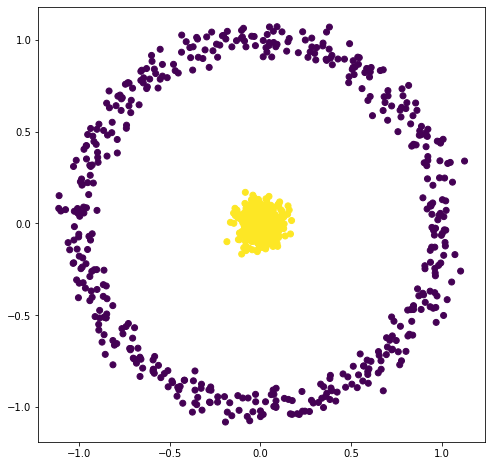

In [2]:
circles_X, circles_y = make_circles(n_samples=1000, noise=.05,
                                    factor=.05, random_state=0)
plt.figure(figsize=(8, 8))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y)

###Contained circles 2

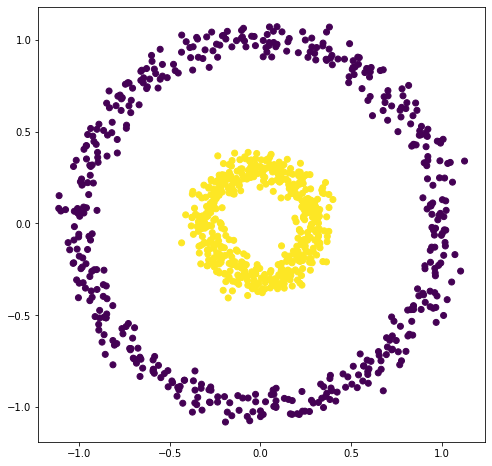

In [3]:
circles2_X, circles2_y = make_circles(n_samples=1000, noise=.05,
                                    factor=.3, random_state=0)
plt.figure(figsize=(8, 8))
plt.scatter(circles2_X[:, 0], circles2_X[:, 1], c=circles2_y)

###Moons

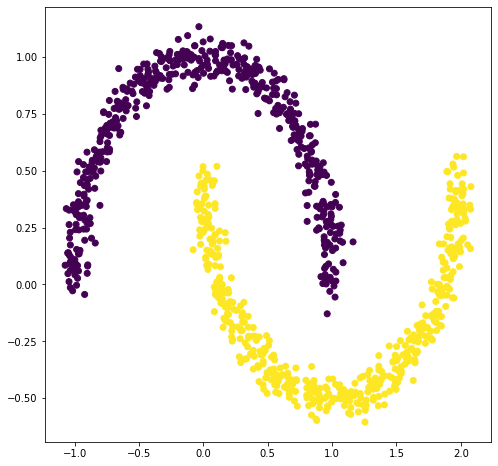

In [4]:
moons_X, moons_y = make_moons(n_samples=1000, noise=.05, random_state=0)
plt.figure(figsize=(8, 8))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y)

##Standard Kmeans

In [ ]:
def euclideanDistance(point1, point2):
    if isinstance(point1, list):
        sumation = 0

        for i in range(len(point1)):
            sumation += (point1[i] - point2[i]) ** 2
        
        return sqrt(sumation)
    else:
        return sqrt((point1 - point2) ** 2)

def getCentroid(cluster):
    centroid = []

    for i in range(len(cluster[0])):
        sumation = 0

        for j in range(len(cluster)):
            sumation += cluster[j][i]

        centroid.append(sumation / len(cluster))

    return centroid

def converge(centroids1, centroids2):
    for i in range(len(centroids1)):
        if centroids1[i] != centroids2[i]:
            return False

    return True

def minus(vector1, vector2):
    vector = []

    for i in range(len(vector1)):
        vector.append(vector1[i] - vector2[i])

    return vector

def dot(vector1, vector2):
    result = 0

    for i in range(len(vector1)):
        result += vector1[i] * vector2[i]
    
    return result

def J_criterion(centroids, clusters):
    result = 0

    for i in range(len(clusters)):
        for element in clusters[i]:
            result += dot(minus(element, centroids[i]), 
                          minus(element, centroids[i]))

    return result

def Kmeans(data, K, initial=None, initial_pos=None, minimize_J=False):
    previous_centroids = []
    previous_J = inf

    if initial != None:
        previous_centroids = initial.copy()
    elif initial_pos != None:
        for pos in initial_pos:
            previous_centroids.append(data[pos])
    else:
        available_points = data.copy()

        for i in range(K):
            r = randint(0, len(available_points) - 1)
            previous_centroids.append(available_points[r])
            del available_points[r]

    while True:
        clusters = [[] for i in range(K)]
        centroids = []
        assignments = []
        
        for i in range(len(data)):
            minimum = euclideanDistance(data[i], previous_centroids[0])
            centroid = 0

            for j in range(len(previous_centroids)):
                distance = euclideanDistance(data[i], previous_centroids[j])

                if distance < minimum:
                    minimum = distance
                    centroid = j
            
            clusters[centroid].append(data[i])
            assignments.append(centroid)

        for i in range(len(clusters)):
            centroids.append(getCentroid(clusters[i]))

        current_J = J_criterion(centroids, clusters)
        print(f"J criterion: {current_J}")

        if (minimize_J and previous_J == current_J) or \
           (not minimize_J and converge(centroids, previous_centroids)):
            return assignments

        previous_J = current_J
        previous_centroids = centroids.copy()

###Standard Kmeans on the contained circles dataset

In [ ]:
assignments = Kmeans(circles_X.tolist(), 2, minimize_J=True)

J criterion: 388.7844143450492
J criterion: 388.24445639995105
J criterion: 386.10457977986914
J criterion: 377.56363873509133
J criterion: 364.2827402310658
J criterion: 362.02683228255825
J criterion: 361.8007324485827
J criterion: 361.78414868019024
J criterion: 361.78414868019024


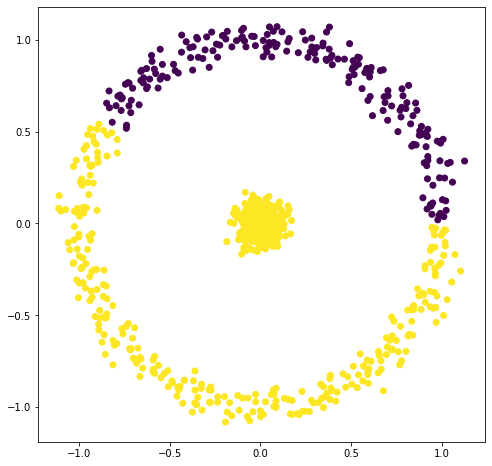

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=assignments)

###Standard Kmeans on the contained circles 2 dataset

In [ ]:
assignments = Kmeans(circles2_X.tolist(), 2, minimize_J=True)

J criterion: 405.2108713562089
J criterion: 399.40170863635046
J criterion: 390.8243963624596
J criterion: 382.38683848347
J criterion: 378.5709037059793
J criterion: 377.3426651190182
J criterion: 377.1308427439069
J criterion: 377.09896156612564
J criterion: 377.09896156612564


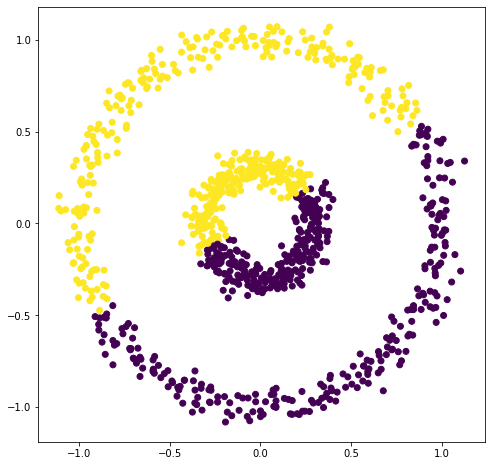

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(circles2_X[:, 0], circles2_X[:, 1], c=assignments)

###Standard Kmeans on the moons dataset

In [ ]:
assignments = Kmeans(moons_X.tolist(), 2, minimize_J=True)

J criterion: 488.51161805012873
J criterion: 434.5784141520442
J criterion: 412.8706409701384
J criterion: 405.3225405038665
J criterion: 403.5604346187706
J criterion: 403.2256708953514
J criterion: 403.1954655494301
J criterion: 403.1954655494301


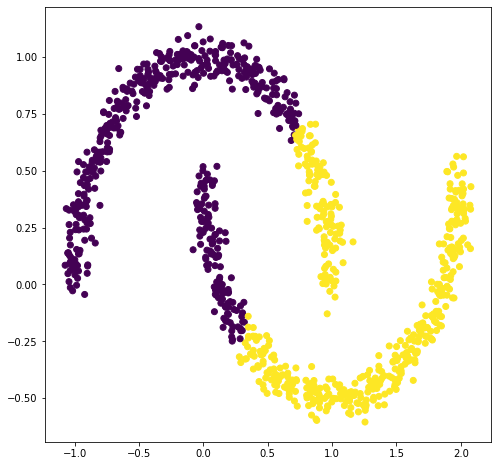

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=assignments)

##Kernelized Kmeans

**Kmeans în spațiul de trăsături**

---

> Fie $X = \{x_{1}, ..., x_{n}\}$ mulțimea de date de antrenament din $\mathbb{R}^n$ și $\phi : \mathbb{R}^n → \mathbb{R}^d$, unde $d \gg n$, o funcție care transpune datele din spațiul de plecare în spațiul de trăsături.

Pașii algoritmului Kmeans în spațiul de trăsături sunt astfel următorii:

1.   Se inițializează $K$ clustere $C_{1}, ..., C_{K}$ în mod aleatoriu, unde fiecare cluster $C_{j}$ conține $n_{j}$ puncte, fiecare punct aparținând unui singur cluster.

> Se repetă următorii pași până când componența clusterelor rămâne neschimbată:

2.   Pentru fiecare cluster $C_{j}$ se calculează centroidul acestuia în spațiul de trăsături folosind următoarea formulă:
$$\mu_{j} = \cfrac{1}{n_{j}} \sum_{x \in C_{j}} \phi(x)$$

3.   Pentru fiecare punct $x_{i}$ se caută clusterul $C_{j}$ al cărui centroid în spațiul de trăsături este cel mai apropiat de $x_{i}$, minimizând următoarea expresie:

$$
cluster_{x_{i}} = \underset{j}{argmin} \text{ } \|\phi(x_{i}) - \mu_{j}\|^2
$$

$$ 
= \underset{j}{argmin} \text{ } \phi(x_{i}) \cdot \phi(x_{i}) + \mu_{j} \cdot \mu_{j} - 2 \cdot \phi(x_{i}) \cdot \mu_{j}
$$

> Întrucât $\phi(x_{i}) \cdot \phi(x_{i})$ nu depinde de $j$ îl putem omite din ecuație. Astfel obținem:

$$ 
cluster_{x_{i}} = \underset{j}{argmin} \text{ } \mu_{j} \cdot \mu_{j} - 2 \cdot \phi(x_{i}) \cdot \mu_{j}
$$

4.   Se asignează punctele la centroidul cel mai apropiat găsit cu formula precedentă:

$$
C_{j} = \{x_{i} \text{ } | \text{ } cluster_{x_{i}} = j\}
$$

---

**Kmeans kernelizat**

---

Plecând de la pseudocodul de mai sus, putem scrie Kmeans kernelizat astfel:

> Fie $K : \mathbb{R}^n \times \mathbb{R}^n → \mathbb{R}$, unde $K(x, x') = \phi(x) \cdot \phi(x')$, o funcție care calculează produsul scalar a două puncte în spațiul de trăsături. Putem astfel înlocui produsele scalare în spațiul de trăsături în pseudocodul de mai sus cu funcția $K$. Calculele se vor realiza astfel în spațiul de plecare, dar algorimul va opera implicit în spațiul de trăsături.

Pașii algoritmului Kmeans kernelizat sunt astfel următorii:

1.   Se inițializează $K$ clustere $C_{1}, ..., C_{K}$ în mod aleatoriu, unde fiecare cluster $C_{j}$ conține $n_{j}$ puncte, fiecare punct aparținând unui singur cluster.

> Se repetă următorii pași până când componența clusterelor rămâne neschimbată:

2.   Pentru fiecare punct $x_{i}$ se caută clusterul $C_{j}$ al cărui centroid în spațiul de trăsături este cel mai apropiat de $x_{i}$, minimizând următoarea expresie:

$$
\begin{cases}
\mu_{j} = \cfrac{1}{n_{j}} \sum_{x \in C_{j}} \phi(x) \\
cluster_{x_{i}} = \underset{j}{argmin} \text{ } \mu_{j} \cdot \mu_{j} - 2 \cdot \phi(x_{i}) \cdot \mu_{j}
\end{cases}
$$

$$ 
⇒ cluster_{x_{i}} = \underset{j}{argmin} \text{ } \left(\cfrac{1}{n_{j}} \sum_{x \in C_{j}} \phi(x) \cdot \cfrac{1}{n_{j}} \sum_{x' \in C_{j}} \phi(x')\right) - 2 \cdot \left( \phi(x_{i}) \cdot \cfrac{1}{n_{j}} \sum_{x \in C_{j}} \phi(x) \right)
$$

$$
 = \underset{j}{argmin} \text{ } \cfrac{1}{n_{j}^2} \cdot \left(\sum_{x \in C_{j}} \sum_{x' \in C_{j}} \phi(x) \cdot \phi(x')\right) - \cfrac{2}{n_{j}} \cdot \left( \sum_{x \in C_{j}} \phi(x_{i}) \cdot \phi(x) \right)
$$


$$
 = \underset{j}{argmin} \text{ } \cfrac{1}{n_{j}^2} \cdot \left(\sum_{x \in C_{j}} \sum_{x' \in C_{j}} K(x, x') \right) - \cfrac{2}{n_{j}} \cdot \left( \sum_{x \in C_{j}} K(x_{i}, x) \right)
$$

3.   Se asignează punctele la centroidul cel mai apropiat găsit cu formula precedentă:

$$
C_{j} = \{x_{i} \text{ } | \text{ } cluster_{x_{i}} = j\}
$$

In [75]:
def minus(vector1, vector2):
    vector = []

    for i in range(len(vector1)):
        vector.append(vector1[i] - vector2[i])

    return vector

def dot(vector1, vector2):
    result = 0

    for i in range(len(vector1)):
        result += vector1[i] * vector2[i]
    
    return result

def norm(vector):
    result = 0

    for v in vector:
      result += v ** 2

    return sqrt(result)

def rbf(vector1, vector2):
    s = 5

    return exp( -s * norm( minus(vector1, vector2) ) ** 2 )

def gramMatrix(data, kernel_function):
    gram = [[0] * len(data) for i in range(len(data))]

    for i in range(len(data)):
        for j in range(i, len(data)):
            gram[i][j] = kernel_function(data[i], data[j])
            gram[j][i] = gram[i][j]

    return gram

def KernelizedKmeans(data, K):
    clusters = [[] for i in range(K)]
    assignments = []
    kernels = gramMatrix(data, rbf)

    for i in range(len(data)):
        cluster = randint(0, K - 1)
        clusters[cluster].append(i)
        assignments.append(cluster)
        
    iteration = 0

    while True:
        new_clusters = [[] for i in range(K)]
        clustersChanged = False

        for xi in range(len(data)):
            minimum = inf
            cluster = 0

            for j in range(K):
                firstSum = 0
                secondSum = 0
                nj = len(clusters[j])

                for x in clusters[j]:
                    for xP in clusters[j]:
                        firstSum += kernels[x][xP]

                for x in clusters[j]:
                    secondSum += kernels[xi][x]

                argmin = (1 / (nj ** 2)) * firstSum - (2 / nj) * secondSum

                if argmin < minimum:
                    minimum = argmin
                    cluster = j

            new_clusters[cluster].append(xi)

            if(assignments[xi] != cluster):
                clustersChanged = True
                assignments[xi] = cluster

        if not clustersChanged:
            return assignments

        clusters = new_clusters.copy()

        iteration += 1
        print(f"Iteration: {iteration}")

###Kernelized Kmeans on the contained circles dataset

In [76]:
assignments = KernelizedKmeans(circles_X, 2)

Iteration: 1
Iteration: 2


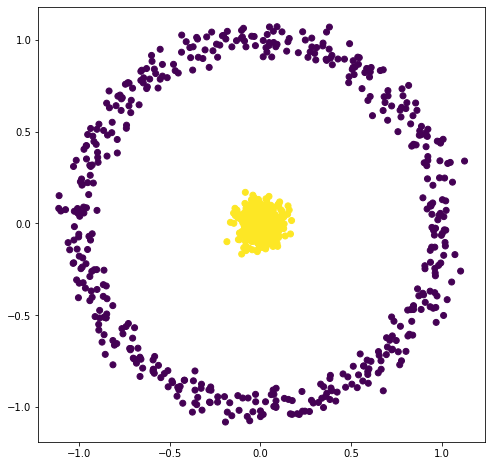

In [77]:
plt.figure(figsize=(8, 8))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=assignments)

###Kernelized Kmeans on the contained circles 2 dataset

In [80]:
assignments = KernelizedKmeans(circles2_X, 2)

Iteration: 1
Iteration: 2
Iteration: 3


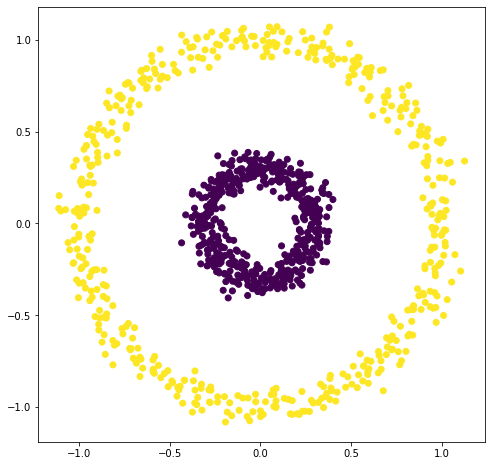

In [81]:
plt.figure(figsize=(8, 8))
plt.scatter(circles2_X[:, 0], circles2_X[:, 1], c=assignments)

###Kernelized Kmeans on the moons dataset

In [84]:
assignments = KernelizedKmeans(moons_X, 2)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42


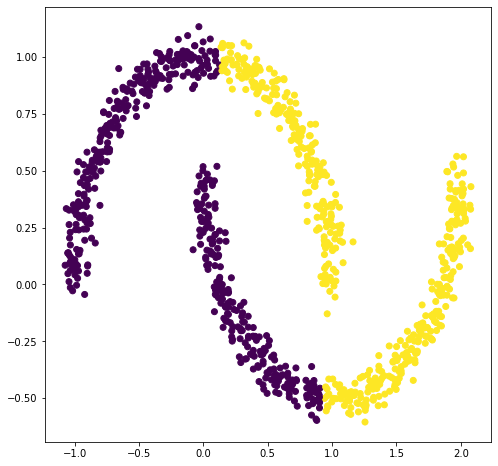

In [85]:
plt.figure(figsize=(8, 8))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=assignments)